# Datos del COVID-19 en colombia



--- Primero realizaremos el llamado de la pagina https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr donde se encontrara datos en relacion del COVID-19 en el pais por parte del gobierno luego de esos estara un apendice al lado derecho de la pagina (API-Docmuentos de la API) y le daremos click en este o simplente https://dev.socrata.com/foundry/www.datos.gov.co/gt2j-8ykr entraremos en este sitio web donde nos dan el codigo de como importar el dataset en diferentes lenguajes de programacion , ademas las dos paginas nos dan como se caracteristicas de el data set. Para este caso tomams el de lenguaje de programacion python, el cual estara puesto debjo de esta viñeta, ademas si no le ponemos limite solo nos apareceran 1000 datos hasta la fecha por tanto le ponemos el limite que aparece en la pagina como cantidad del dataset para la fecha 23/04/2020 son 4561.





In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
!pip install pandas
!pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gt2j-8ykr",limit=4561) 

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Veremos la cabezera de los datos de forma, para ver como estos no salen en datafame ya convertido por la libreria pandas

In [0]:
results_df.head()

,id_de_caso,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


Como veran cada columna dara una informacion diferente la cual partira de inicial de 16 columnas por tanto ahora borraremos la informacion que consideremos innecesaria.

In [0]:
results_df.columns

Index(['id_de_caso', 'fecha_de_notificaci_n', 'codigo_divipola',
       'ciudad_de_ubicaci_n', 'departamento', 'atenci_n', 'edad', 'sexo',
       'tipo', 'estado', 'pa_s_de_procedencia', 'fis', 'fecha_de_muerte',
       'fecha_diagnostico', 'fecha_recuperado', 'fecha_reporte_web'],
      dtype='object')

Observando las cabezeras de los datos anteriormente relizeremos una limpieza de datos y como es un simple ejercicio dejaremos las variables que para mi consideracion son las masinfluyentes y mas facil de manejar.

In [0]:
results_df=results_df.drop(['fecha_de_notificaci_n','codigo_divipola','fecha_reporte_web', 'fis'],axis=1)
results_df

,id_de_caso,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fecha_de_muerte,fecha_diagnostico,fecha_recuperado
0,1,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000
1,2,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000
2,3,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000
3,4,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000
4,5,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...
4556,4557,Bogotá D.C.,Bogotá D.C.,Casa,20,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4557,4558,Bogotá D.C.,Bogotá D.C.,Casa,33,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4558,4559,Cali,Valle del Cauca,Casa,69,F,En estudio,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4559,4560,Medellín,Antioquia,Casa,8,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -


Luego de esto pasaremos a separar nuestro dataset por departamento y ciudad de ubicacion, ademas de renombrar los nombres de las columnas.

In [0]:
results_df.columns = ['Id', 'Ciudad', 'Departamento', 'Atencion', 'Edad', 'Sexo', 'Tipo','Estado', 'Pais de procedencia', 'Fecha de muerte', 'Fecha de diagnostico', 'Fecha de recuperado']
results_df

,Id,Ciudad,Departamento,Atencion,Edad,Sexo,Tipo,Estado,Pais de procedencia,Fecha de muerte,Fecha de diagnostico,Fecha de recuperado
0,1,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000
1,2,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000
2,3,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000
3,4,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000
4,5,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...
4556,4557,Bogotá D.C.,Bogotá D.C.,Casa,20,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4557,4558,Bogotá D.C.,Bogotá D.C.,Casa,33,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4558,4559,Cali,Valle del Cauca,Casa,69,F,En estudio,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -
4559,4560,Medellín,Antioquia,Casa,8,F,Relacionado,Leve,COLOMBIA,- -,2020-04-23T00:00:00.000,- -


Podemos saber cuantos departamentos estan contageados por el COVID-19, recordar que:
 ######  **Para las ciudades que son distritos (Cartagena, Bogotá, Santa Marta, Buenaventura y Barranquilla), sus cifras son independientes a las cifras del departamento al cual pertecen, en concordancia con la división oficial de Colombia.   **


In [0]:
results_df['Atencion'].unique()

array(['Recuperado', 'Casa', 'Fallecido', 'Hospital UCI', 'Hospital',
       'fallecido'], dtype=object)

In [0]:
results_df['Departamento'].unique()

array(['Bogotá D.C.', 'Valle del Cauca', 'Antioquia',
       'Cartagena D.T. y C.', 'Huila', 'Meta', 'Risaralda',
       'Norte de Santander', 'Caldas', 'Cundinamarca',
       'Barranquilla D.E.', 'Santander', 'Quindio', 'Tolima', 'Cauca',
       'Santa Marta D.T. y C.', 'Cesar',
       'Archipiélago de San Andrés Providencia y Santa Catalina',
       'Casanare', 'Nariño', 'Atlántico', 'Boyacá', 'Córdoba', 'Bolívar',
       'Sucre', 'Magdalena', 'La Guajira', 'Buenaventura D.E.', 'Chocó',
       'Amazonas', 'Caquetá'], dtype=object)

In [0]:
q=len(results_df['Departamento'].unique())-5 # Por los 5 distritos y un departamento de mas
print('El total de departamentos contageados en el pais es de ',q)
print('El total de departamentos con ciudades consideradas distritos es de',q+5)
print('El % de departamentos contageados es de',int((q/32)*100),'%')

El total de departamentos contageados en el pais es de  26
El total de departamentos con ciudades consideradas distritos es de 31
El % de departamentos contageados es de 81 %


In [0]:
for i in range(len(results_df)):
  if results_df['Departamento'][i]=='CUNDINAMARCA':
    results_df['Departamento'][i]= 'Cundinamarca'
  else:
    pass
results_df['Departamento'].unique()

array(['Bogotá D.C.', 'Valle del Cauca', 'Antioquia',
       'Cartagena D.T. y C.', 'Huila', 'Meta', 'Risaralda',
       'Norte de Santander', 'Caldas', 'Cundinamarca',
       'Barranquilla D.E.', 'Santander', 'Quindio', 'Tolima', 'Cauca',
       'Santa Marta D.T. y C.', 'Cesar',
       'Archipiélago de San Andrés Providencia y Santa Catalina',
       'Casanare', 'Nariño', 'Atlántico', 'Boyacá', 'Córdoba', 'Bolívar',
       'Sucre', 'Magdalena', 'La Guajira', 'Buenaventura D.E.', 'Chocó',
       'Amazonas', 'Caquetá'], dtype=object)

Esto mismo que realizamos para las ciudades para saber si se tiene datos repetidos.

In [0]:
results_df['Ciudad'].unique()

array(['Bogotá D.C.', 'Guadalajara de Buga', 'Medellín', 'Itagüí',
       'Cartagena de Indias', 'Neiva', 'Palmira', 'Villavicencio',
       'Rionegro', 'Cali', 'Dosquebradas', 'Cúcuta', 'Manizales',
       'Subachoque', 'Soacha', 'Barranquilla', 'Floridablanca', 'Armenia',
       'Pereira', 'Cajicá', 'Ibagué', 'Bucaramanga', 'Popayán', 'Viterbo',
       'Anapoima', 'La Estrella', 'Envigado', 'Santa Marta', 'Chía',
       'Madrid', 'Villa del Rosario', 'Cartago', 'Guarne', 'Bello',
       'Calarcá', 'Valledupar', 'La Dorada', 'Chinchiná', 'San Andrés',
       'Yumbo', 'Yopal', 'Guatapé', 'Cota', 'Sabaneta', 'Villamaría',
       'Trujillo', 'Pacho', 'Retiro', 'Apartadó', 'Ipiales', 'Mosquera',
       'La Unión', 'Fusagasugá', 'La Calera', 'Villeta', 'Palermo',
       'San Pedro', 'Calima', 'Funza', 'Tuluá', 'Soledad', 'El Dovio',
       'Santana', 'Frontino', 'Tunja', 'Tocancipá', 'Puerto Colombia',
       'Sahagún', 'Pasto', 'Polonuevo', 'Villapinzón', 'Montebello',
       'Santa Rosa 

Realizamos un pqueño codigo donde sabremos si se tiene una ciudad repetida por lo cualse reliza el siguiente y si se tiene que el tamaño de la ciudades anteriores es igual la suma de la matriz que hallamos es que no hay no se tiene ciudades repetidas.

In [0]:
import numpy as np
B=results_df['Ciudad'].unique()
C=(len(B),len(B))
A=np.zeros(C)
for i in range(len(B)):
  for j in range(len(B)):
    if B[i]==B[j]:
      A[i][j]=True
    else:
      A[i][j]=False
len(B)==np.sum(A)

True

Ademas veremos otras variables como es el estado para ver si no se repiten mas variables

In [0]:
results_df['Estado'].unique()

array(['Leve', 'Fallecido', 'Grave', 'fallecido', 'Moderado'],
      dtype=object)

In [0]:
for i in range(len(results_df)):
  if results_df['Estado'][i]=='fallecido':
    results_df['Estado'][i]= 'Fallecido'
  elif results_df['Estado'][i]=='leve':
      results_df['Estado'][i]= 'Leve'
results_df['Estado'].unique()

array(['Leve', 'Fallecido', 'Grave', 'Moderado'], dtype=object)

### Como veran se tiene una ciudad que se denomina 'CUNDINAMRCA' para este caso la trabajaremos como una ciudad y de todas formas veremos que cantidad de personas nos aparece en esta supuesta ciudad ya que quizas cuando se realizo las toma de datos pudo haber una equivocacion o otra situacion.

In [0]:
results_df=results_df.set_index(['Departamento','Ciudad'])
results_df

Id  ...      Fecha de recuperado
Departamento          Ciudad                     ...                         
Bogotá D.C.           Bogotá D.C.             1  ...  2020-03-13T00:00:00.000
Valle del Cauca       Guadalajara de Buga     2  ...  2020-03-19T00:00:00.000
Antioquia             Medellín                3  ...  2020-03-15T00:00:00.000
                      Medellín                4  ...  2020-03-26T00:00:00.000
                      Medellín                5  ...  2020-03-23T00:00:00.000
...                                         ...  ...                      ...
Bogotá D.C.           Bogotá D.C.          4557  ...                    -   -
                      Bogotá D.C.          4558  ...                    -   -
Valle del Cauca       Cali                 4559  ...                    -   -
Antioquia             Medellín             4560  ...                    -   -
Santa Marta D.T. y C. Santa Marta          4561  ...                    -   -

[4561 rows x 10 columns]

In [0]:
results_df.loc[[('Cundinamarca','Cundinamarca')]]

,,Id,Atencion,Edad,Sexo,Tipo,Estado,Pais de procedencia,Fecha de muerte,Fecha de diagnostico,Fecha de recuperado
Departamento,Ciudad,,,,,,,,,,
Cundinamarca,Cundinamarca,3964,Fallecido,1,M,En estudio,Fallecido,COLOMBIA,2020-04-21T00:00:00.000,2020-04-20T00:00:00.000,- -


Al parecer es un infanteque murio al dia de haber sido diagnosticado, se revisara en la base de datos del gobierno para ver que nos aparece, cuando revise este (aparece), de esta misma manera.

## Diagramas

In [0]:
def Diagramas(a):
       import matplotlib.pyplot as plt
       a1=a['Fecha de diagnostico']
       x1=a['Fecha de diagnostico'].unique()
       y11=np.zeros(len(x1))
       y22=np.zeros(len(x1))
       for i in range(len(x1)):
          for j in range(len(a1)):
            if a1[j]==x1[i]:
               y11[i]+=1
       for i in range(len(x1)):
           y22[i]=np.sum(y11[:i+1])
           p=x1[i]
           p=p[0:10]
           x1[i]=p
       f=a['Edad']
       l=np.zeros(3)
       for i in range(len(f)):
           if int(f[i])<18:
              f[i]='Menor de edad'
              l[2]+=1
           elif int(f[i])>=18 and int(f[i])<70:
              f[i]='Adulto'
              l[0]+=1
           elif int(f[i])>=70:
             f[i]='Adulto mayor'
             l[1]+=1
       f=f.unique()
       print('\n Datos por rango de edad: ')
       print(f)
       print(l)
       s=a['Sexo']
       for i in range(len(s)):
         if s[i]=='f':
           s[i]='F'
         elif s[i]=='m':
           s[i]='M'
       sx=s.unique()
       print('\n Datos por masculino y femenino:')
       print(sx)
       s1=np.zeros(len(sx))
       for i in range(len(a)):
         if s[i]=='F':
            s1[1]+=1
         elif s[i] == 'M':
            s1[0]+=1
       print(s1)
       fig,[(figura1,figura2),(figura3,figura4)] =  plt.subplots(2,2,figsize=(115,25))
       figura1.plot(x1,y11)
       plt.setp(figura1, xlabel='Fecha')
       plt.setp(figura1, ylabel='Contageados')
       figura2.plot(x1,y22)
       plt.setp(figura2, xlabel='Fecha')
       plt.setp(figura2, ylabel='Contageados')
       figura3.bar(f,l)
       plt.setp(figura3, xlabel='Intervalo de edad')
       plt.setp(figura3, ylabel='Contageados')
       figura4.pie(s1,labels=sx,autopct="%0.1f %%")
       plt.show()
       return y22

In [0]:
def prediccion(y22):
  from scipy.optimize import curve_fit
  import matplotlib.pyplot as plt
  import numpy as np
  y22=y22
  x11=np.array(range(1,len(y22)+1))
  print('los dias que lleva presente el coronavirus es de ',len(x11),'dias')
  entreno=len(x11)-1
  modelo=curve_fit(lambda t,a,b: a*np.exp(b*t),  x11[:entreno],  y22[:entreno],  p0=(y22[0],1))
  # y=modelo[0] exp(modelo[1]*x)
  A=modelo[0][0]
  B=modelo[0][1]
  modelo=modelo[0][0]*np.exp(modelo[0][1]*x11)
  plt.plot(x11,y22,'o')
  plt.plot(x11,modelo)
  plt.show()
  return A,B

In [0]:
def prediccionahorasi(A,B,dia):
  import numpy as np
  y=A*np.exp(B*dia)
  print('Para el dia #',dia,'se estima que se tendra ',int(y),'contagiados')

----En el municipio de  Medellín se tiene:----
En total se tiene 267 casos por COVID-19 contando fallecidos y recuperados en el municipio de Medellín
En total se tiene 2 casos de COVID-19 fallecidos
En total se tiene 80 casos de COVID-19 recuperados
En total se tiene 185 caso ahora latentes
Para el municipio de Medellín se tiene los siguientes diagramas: 

 Datos por rango de edad: 
['Adulto' 'Adulto mayor' 'Menor de edad']
[241.  13.  13.]

 Datos por masculino y femenino:
['F' 'M']
[124. 143.]


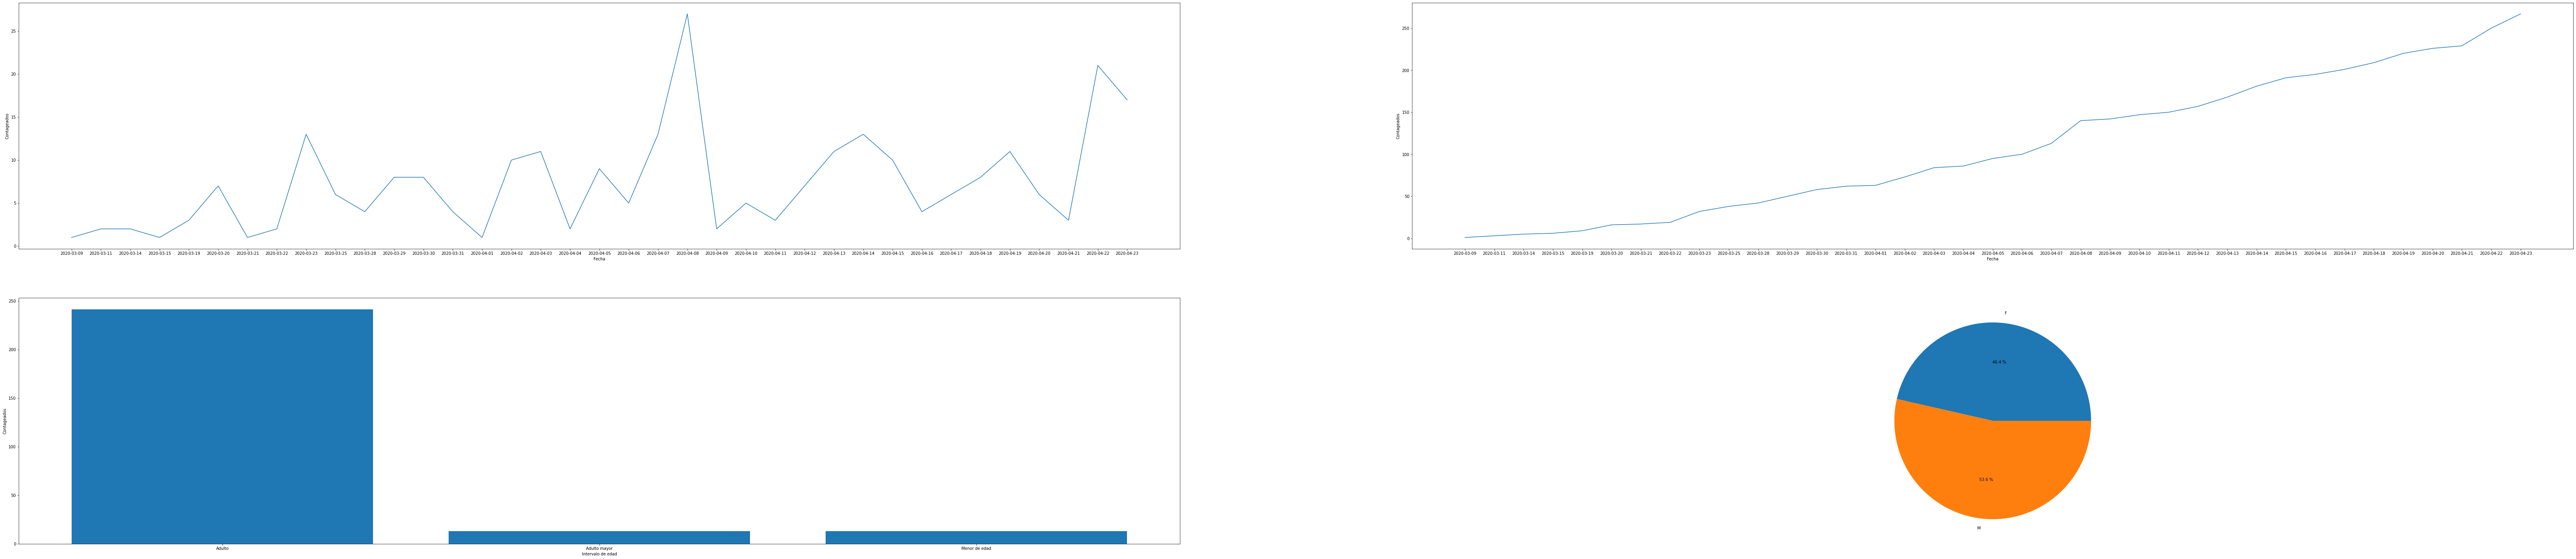

los dias que lleva presente el coronavirus es de  37 dias


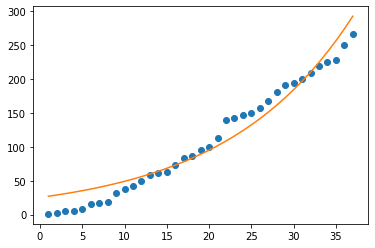

Para el dia # 37 se estima que se tendra  292 contagiados


In [0]:
def Departamentos(departamento=None,municipio=None,dia=1):
  import pandas as pd
  import numpy as np
  if departamento and municipio==None:
       a=results_df.loc[departamento]
       a=a.set_index('Atencion')
       b=a.loc['Fallecido']
       c=a.loc['Recuperado']
       print('----En el departamento de ',departamento,'se tiene:---- ')
       print('En total se tiene',len(a),'casos por COVID-19 contando fallecidos y recuperados en el departamento de',departamento)
       print('En total se tiene',len(b),'casos de COVID-19 fallecidos')
       print('En total se tiene',len(c),'casos de COVID-19 recuperados')
       print('En total se tiene',len(a)-len(b)-len(c),'caso ahora latentes')
       #### DIAGRAMAS
       print("\x1b[1;34m"+"A nivel nacional se tiene los siguientes diagramas: ")  
       y22=Diagramas(a=a)
       A,B=prediccion(y22=y22)
       prediccionahorasi(A,B,dia)
       return y22
       
  elif departamento==None and municipio==None:
        a=results_df.set_index('Atencion')
        b=results_df.set_index('Atencion')
        c=results_df.set_index('Atencion')
        b=b.loc['Fallecido']
        c=c.loc['Recuperado']
        print('En total se tiene',len(results_df),'casos por COVID-19 contando fallecidos y recuperados en todo el pais')
        print('En total se tiene',len(b),'casos de COVID-19 fallecidos')
        print('En total se tiene',len(c),'casos de COVID-19 recuperados')
        print('En total se tiene',len(results_df)-len(b)-len(c),'caso ahora latentes')
        #### DIAGRAMAS
        print("\x1b[1;34m"+"a nivel nacional se tiene los siguientes diagramas: ")  
        y22=Diagramas(a=a)
        A,B=prediccion(y22=y22)
        prediccionahorasi(A,B,dia)
        return y22

        
  elif departamento and municipio:
       a=results_df.loc[[(departamento,municipio)]]
       a=a.set_index('Atencion')
       b=a.loc['Fallecido']
       c=a.loc['Recuperado']
       print('----En el municipio de ',municipio,'se tiene:----')
       print('En total se tiene',len(a),'casos por COVID-19 contando fallecidos y recuperados en el municipio de',municipio)
       print('En total se tiene',len(b),'casos de COVID-19 fallecidos')
       print('En total se tiene',len(c),'casos de COVID-19 recuperados')
       print('En total se tiene',len(a)-len(b)-len(c),'caso ahora latentes')
       #### DIAGRAMAS
       print("\x1b[1;34m"+"Para el municipio de "+municipio+" se tiene los siguientes diagramas: ")  
       y22=Diagramas(a=a)
       A,B=prediccion(y22=y22)
       prediccionahorasi(A,B,dia)
       return y22
       
  

    
y22=Departamentos(departamento='Antioquia',municipio='Medellín',dia=37)
   


In [0]:
 100*((292 -267)/267)

9.363295880149813

In [0]:
z